In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
housing_data= pd.read_csv('Housing.csv')
housing_data.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [3]:
housing_data = housing_data.drop(columns = ['Unnamed: 0'],axis=1)
housing_data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [4]:
housing_data.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


(6.0, 0.0)

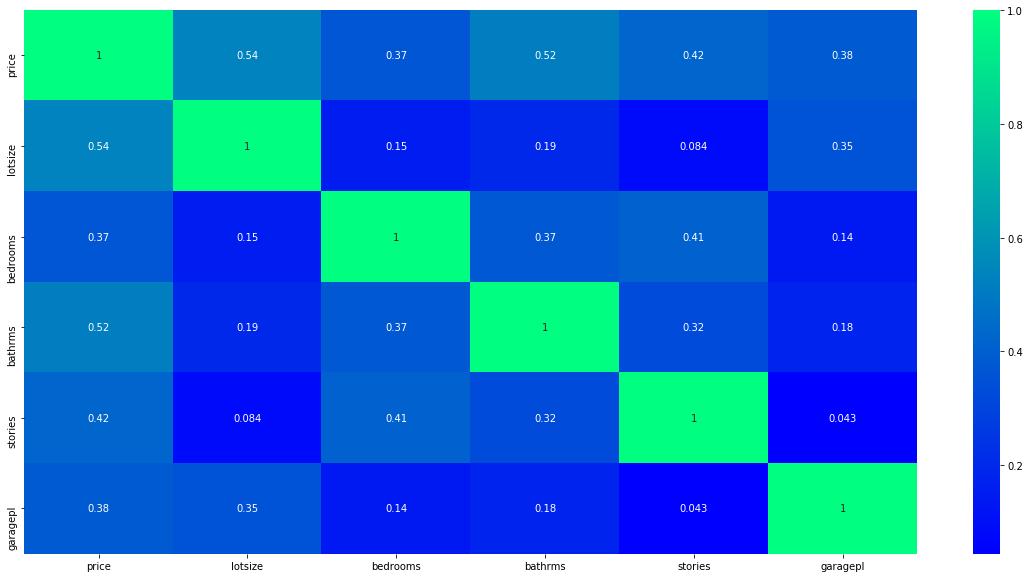

In [6]:
plt.figure(figsize=(20,10))
housing_corr_score = housing_data.corr()
_=sns.heatmap(housing_corr_score,annot=True, cmap='winter')
b,t = plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)

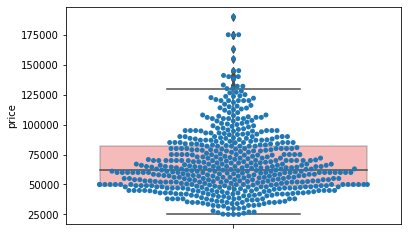

In [7]:
_=sns.swarmplot(y='price',data=housing_data)
_=sns.boxplot(y='price',data=housing_data,boxprops=dict(alpha=0.3),color='red')

In [8]:
Binary_Features = housing_data[['driveway','recroom','fullbase','gashw','airco','prefarea']]
Int_Features = housing_data[['bedrooms', 'bathrms','stories','garagepl']]
Cont_Features = housing_data[['lotsize']]
Target=housing_data['price']

from sklearn.preprocessing import LabelEncoder
Lencoder = LabelEncoder()

Encoded_Binary_Features=[]

for i in Binary_Features.columns:
    Binary_Features_Temp = Lencoder.fit_transform(Binary_Features[i])
    Encoded_Binary_Features.append(Binary_Features_Temp)

Encoded_Binary_Features = pd.DataFrame(Encoded_Binary_Features,index = Binary_Features.columns)
Encoded_Binary_Features = Encoded_Binary_Features.T
Final_Features = pd.concat([Cont_Features,Encoded_Binary_Features,Int_Features],axis=1)
Final_Features

,lotsize,driveway,recroom,fullbase,gashw,airco,prefarea,bedrooms,bathrms,stories,garagepl
0,5850,1,0,1,0,0,0,3,1,2,1
1,4000,1,0,0,0,0,0,2,1,1,0
2,3060,1,0,0,0,0,0,3,1,1,0
3,6650,1,1,0,0,0,0,3,1,2,0
4,6360,1,0,0,0,0,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
541,4800,1,1,0,0,1,0,3,2,4,0
542,6000,1,0,0,0,1,0,3,2,4,0
543,6000,1,1,0,0,1,0,3,2,4,1
544,6000,1,1,0,0,1,0,3,2,2,1


,Params,Scores,Pvalues
0,lotsize,279434.096906,0.000000
10,garagepl,282.834244,0.002034
2,recroom,248.943481,0.073715
4,gashw,224.862039,0.360509
6,prefarea,224.452145,0.367734
5,airco,199.539805,0.810078
3,fullbase,172.459034,0.989885
9,stories,129.045429,1.000000
8,bathrms,64.317810,1.000000
7,bedrooms,49.622597,1.000000


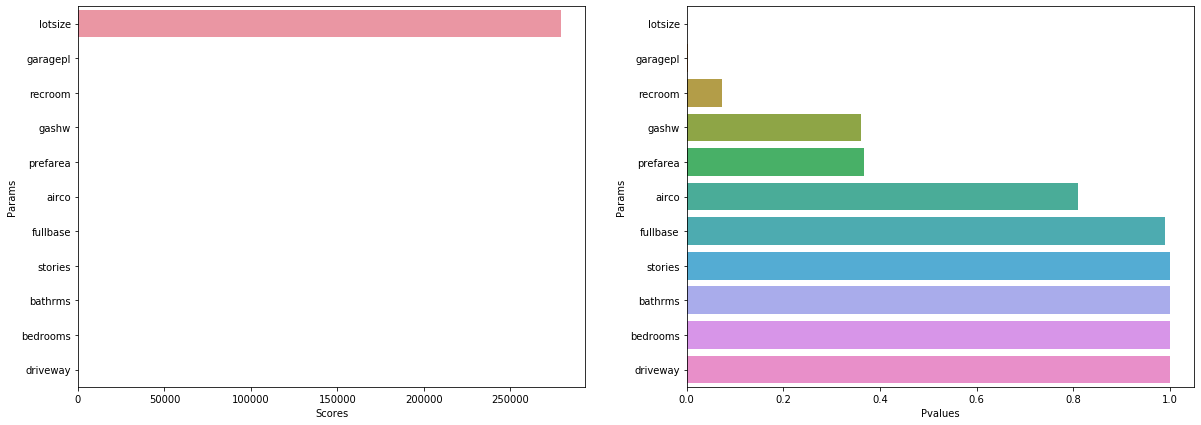

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_features= SelectKBest(score_func=chi2,k='all')
best_features_fit = best_features.fit(Final_Features,Target)
best_features_scores = pd.DataFrame(best_features_fit.scores_)
best_features_params = pd.DataFrame(Final_Features.columns)
best_features_pvalues=pd.DataFrame(best_features_fit.pvalues_)

chi2_df = pd.concat([best_features_params,best_features_scores,best_features_pvalues],axis=1)
chi2_df.columns=['Params','Scores','Pvalues']
chi2_df = chi2_df.sort_values(by=['Scores'],ascending=False)

f,axes=plt.subplots(1,2,figsize=(20,7))
axes=axes.flatten()
_=sns.barplot(y='Params',x='Scores',data=chi2_df,ax=axes[0])
_=sns.barplot(y='Params',x='Pvalues',data=chi2_df,ax=axes[1])

Feature_Set1 = chi2_df['Params'][0:3]
Feature_Set1 = pd.Series.tolist(Feature_Set1)
Feature_Set1
chi2_df

['bathrms', 'stories', 'lotsize', 'recroom']

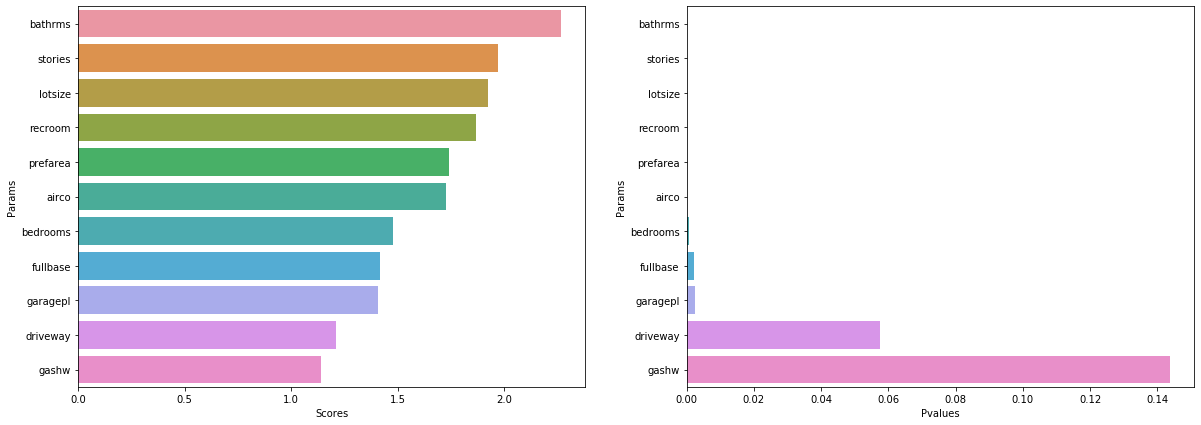

In [10]:
from sklearn.feature_selection import f_classif

best_features=SelectKBest(score_func=f_classif,k='all')
best_features_fit=best_features.fit(Final_Features,Target)
best_features_scores=pd.DataFrame(best_features_fit.scores_)
best_features_params=pd.DataFrame(Final_Features.columns)
best_features_pvalues=pd.DataFrame(best_features_fit.pvalues_)

f_classif_df = pd.concat([best_features_params,best_features_scores,best_features_pvalues], axis=1)
f_classif_df.columns=['Params','Scores','Pvalues']
f_classif_df= f_classif_df.sort_values(by=['Scores'],ascending=False)

f,axes=plt.subplots(1,2,figsize=(20,7))
axes=axes.flatten()
_=sns.barplot(y='Params',x='Scores',data=f_classif_df,ax=axes[0])
_=sns.barplot(y='Params',x='Pvalues',data=f_classif_df,ax=axes[1])

Feature_Set2=f_classif_df.Params[0:4]
Feature_Set2=pd.Series.tolist(Feature_Set2)
Feature_Set2

C:\Users\jk113\Anaconda3\envs\ML GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jk113\Anaconda3\envs\ML GPU\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


['lotsize', 'garagepl', 'stories', 'bedrooms'] ['lotsize', 'garagepl', 'stories', 'bedrooms']


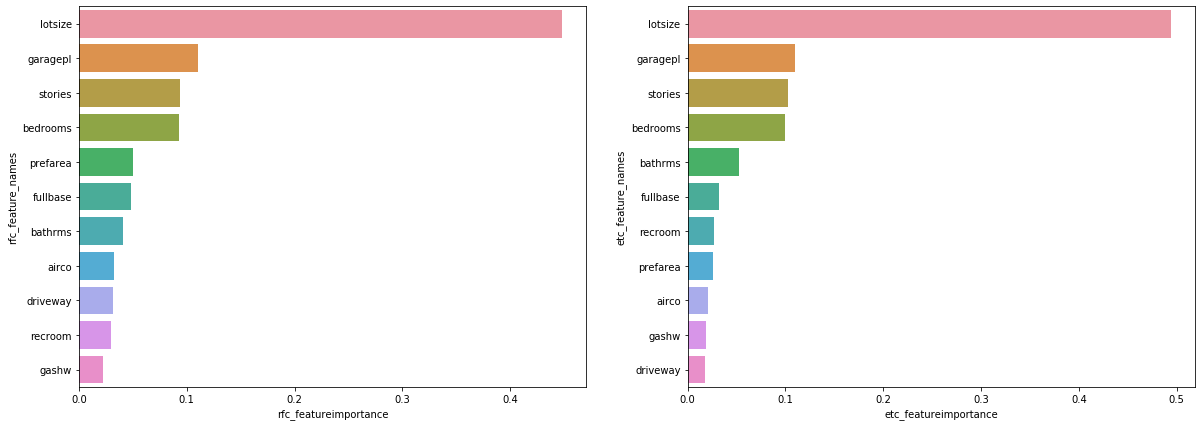

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
rfc = RandomForestClassifier()
rfc.fit(Final_Features,Target)
rfc_featureimportance = pd.DataFrame(rfc.feature_importances_,columns=['rfc_featureimportance'])
rfc_feature_names = pd.DataFrame(Final_Features.columns,columns=['rfc_feature_names'])
rfcfeature_df = pd.concat([rfc_featureimportance,rfc_feature_names],axis=1)
rfcfeature_df = rfcfeature_df.sort_values(by=['rfc_featureimportance'],ascending=False)

etc=ExtraTreesClassifier()
etc.fit(Final_Features,Target)
etc_featureimportance = pd.DataFrame(etc.feature_importances_,columns=['etc_featureimportance'])
etc_feature_names=pd.DataFrame(Final_Features.columns,columns=['etc_feature_names'])
etc_feature_df = pd.concat([etc_featureimportance,etc_feature_names],axis=1)
etc_feature_df= etc_feature_df.sort_values(by=['etc_featureimportance'],ascending=False)

f,axes=plt.subplots(1,2,figsize=(20,7))
axes=axes.flatten()
_ = sns.barplot(x='rfc_featureimportance',y='rfc_feature_names',data=rfcfeature_df,ax=axes[0])    
_ = sns.barplot(x='etc_featureimportance',y='etc_feature_names',data=etc_feature_df,ax=axes[1]) 

Feature_Set3 = rfcfeature_df['rfc_feature_names'][0:4]
Feature_Set3 = pd.Series.tolist(Feature_Set3)

Feature_Set4 = etc_feature_df['etc_feature_names'][0:4]
Feature_Set4 = pd.Series.tolist(Feature_Set4)
print(Feature_Set3, Feature_Set4)

['lotsize', 'driveway']

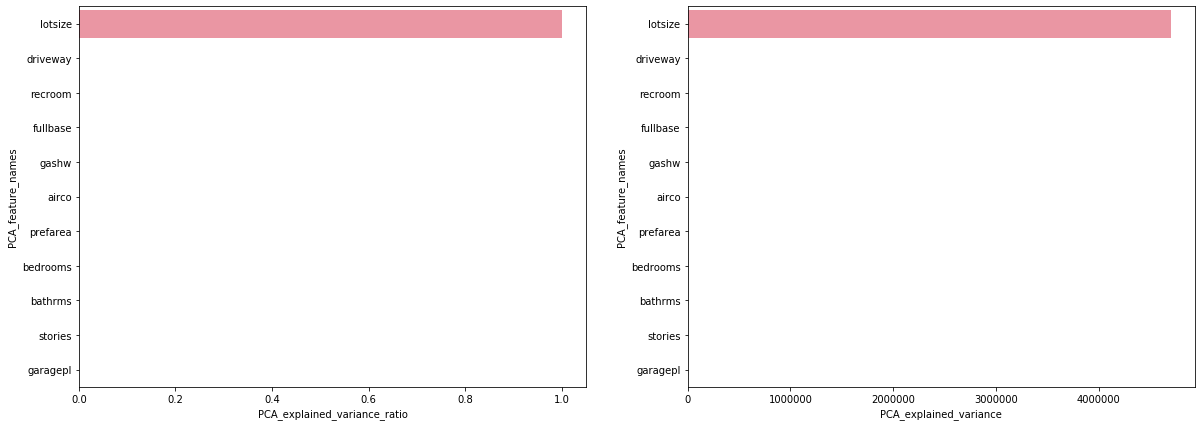

In [12]:
from sklearn.decomposition import PCA 
    
pca = PCA()
FS_PCAfeatures = pca.fit_transform(Final_Features)
PCA_explained_variance =pd.DataFrame(pca.explained_variance_,columns=['PCA_explained_variance'])
PCA_explained_variance_ratio =pd.DataFrame(pca.explained_variance_ratio_,columns=['PCA_explained_variance_ratio'])
PCA_feature_names = pd.DataFrame(Final_Features.columns,columns=['PCA_feature_names'])

PCA_variance_df = pd.concat([PCA_explained_variance,PCA_explained_variance_ratio,PCA_feature_names],axis=1)
PCA_variance_df = PCA_variance_df.sort_values(by=['PCA_explained_variance_ratio'],ascending= False)

f,axes=plt.subplots(1,2,figsize=(20,7))
axes=axes.flatten()
_ = sns.barplot(x='PCA_explained_variance_ratio',y='PCA_feature_names',data=PCA_variance_df,ax=axes[0])    
_ = sns.barplot(x='PCA_explained_variance',y='PCA_feature_names',data=PCA_variance_df,ax=axes[1]) 
Feature_Set5 = PCA_variance_df['PCA_feature_names'][0:2]
Feature_Set5 = pd.Series.tolist(Feature_Set5)
Feature_Set5

['recroom', 'driveway']
['recroom', 'driveway', 'bedrooms', 'bathrms', 'garagepl', 'airco', 'prefarea', 'stories', 'fullbase', 'lotsize']


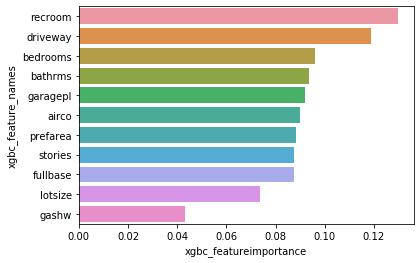

In [13]:
from xgboost import XGBClassifier

xgbc=XGBClassifier()
xgbc.fit(Final_Features,Target)
xgbc_featureimportance = pd.DataFrame(xgbc.feature_importances_,columns=['xgbc_featureimportance'])
xgbc_feature_names = pd.DataFrame(Final_Features.columns,columns=['xgbc_feature_names'])
xgbc_feature_df = pd.concat([xgbc_featureimportance,xgbc_feature_names],axis=1)
xgbc_feature_df= xgbc_feature_df.sort_values(by=['xgbc_featureimportance'],ascending=False)

_ = sns.barplot(x='xgbc_featureimportance',y='xgbc_feature_names',data=xgbc_feature_df)
Feature_Set6 = xgbc_feature_df['xgbc_feature_names'][0:2]
Feature_Set6 = pd.Series.tolist(Feature_Set6)
print(Feature_Set6)

Feature_Set7 = xgbc_feature_df['xgbc_feature_names'][0:10]
Feature_Set7 = pd.Series.tolist(Feature_Set7)
print(Feature_Set7)

['bathrms', 'gashw', 'airco', 'prefarea']


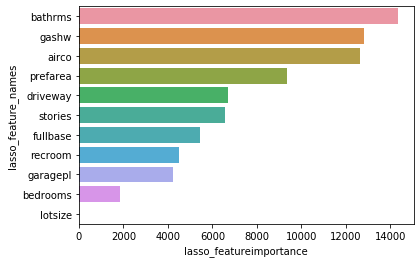

In [14]:
from sklearn.linear_model import Lasso 

lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(Final_Features,Target)
lasso_reg_featureimportance=pd.DataFrame(lasso_reg.coef_,columns=['lasso_featureimportance'])
lasso_reg_feature_names = pd.DataFrame(Final_Features.columns,columns=['lasso_feature_names'])
lasso_reg_feature_df = pd.concat([lasso_reg_featureimportance,lasso_reg_feature_names],axis=1)
lasso_reg_feature_df = lasso_reg_feature_df.sort_values(by=['lasso_featureimportance'],ascending=False)

_ = sns.barplot(x='lasso_featureimportance',y='lasso_feature_names',data=lasso_reg_feature_df)
Feature_Set8 = lasso_reg_feature_df['lasso_feature_names'][0:4]
Feature_Set8 = pd.Series.tolist(Feature_Set8)
print(Feature_Set8)

In [15]:
Features_List=(Feature_Set1,Feature_Set2,Feature_Set3,Feature_Set4,Feature_Set5,Feature_Set6,Feature_Set7,Feature_Set8)
Features_List

(['lotsize', 'garagepl', 'recroom'],
 ['bathrms', 'stories', 'lotsize', 'recroom'],
 ['lotsize', 'garagepl', 'stories', 'bedrooms'],
 ['lotsize', 'garagepl', 'stories', 'bedrooms'],
 ['lotsize', 'driveway'],
 ['recroom', 'driveway'],
 ['recroom',
  'driveway',
  'bedrooms',
  'bathrms',
  'garagepl',
  'airco',
  'prefarea',
  'stories',
  'fullbase',
  'lotsize'],
 ['bathrms', 'gashw', 'airco', 'prefarea'])